# **Import Data**

In [93]:
# import pandas as pd

df = pd.read_csv('delaney_solubility_with_descriptors.csv')

# **Data Preparation**



## Data separation as X and y

In [33]:
y = df['logS'] # Grab logS as y

In [34]:
X = df.drop('logS', axis=1) # Grab the rest of tghe columns as X

## Split data into training and testing sets

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# **Model Building**

## Linear Regresssion

### **Training the model**

In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train.values, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [94]:
y_lr_train_pred = lr.predict(X_train.values)
y_lr_test_pred = lr.predict(X_test.values)

# lr__training_predictions
# print(lr__testing_predictions)

### **Evaluate Model Performance**

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [96]:
print('LR MSE (Train):', lr_train_mse)
print('LR R2 (Train):', lr_train_r2)
print('LR MSE (Test):', lr_test_mse)
print('LR R2 (Test):', lr_test_r2)

LR MSE (Train): 1.007536295109369
LR R2 (Train): 0.7645051774663391
LR MSE (Test): 1.0206953660861033
LR R2 (Test): 0.7891616188563282


In [97]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Random Forest

### **Training the model** 

In [98]:
from sklearn.ensemble import RandomForestRegressor # Using regressor instead of classifier because of quantitative data.

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train.values, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction** 

In [99]:
y_rf_train_pred = rf.predict(X_train.values)
y_rf_test_pred = rf.predict(X_test.values)

### **Evaluate Model Performance** 

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [101]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparison**

In [106]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True) # Adding both models to the same table

df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualisation of Prediction Results**

Text(0.5, 0, 'Experimental LogS')

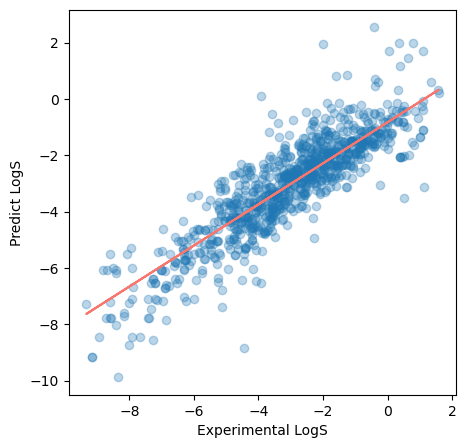

In [112]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

# Add Trendline
z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

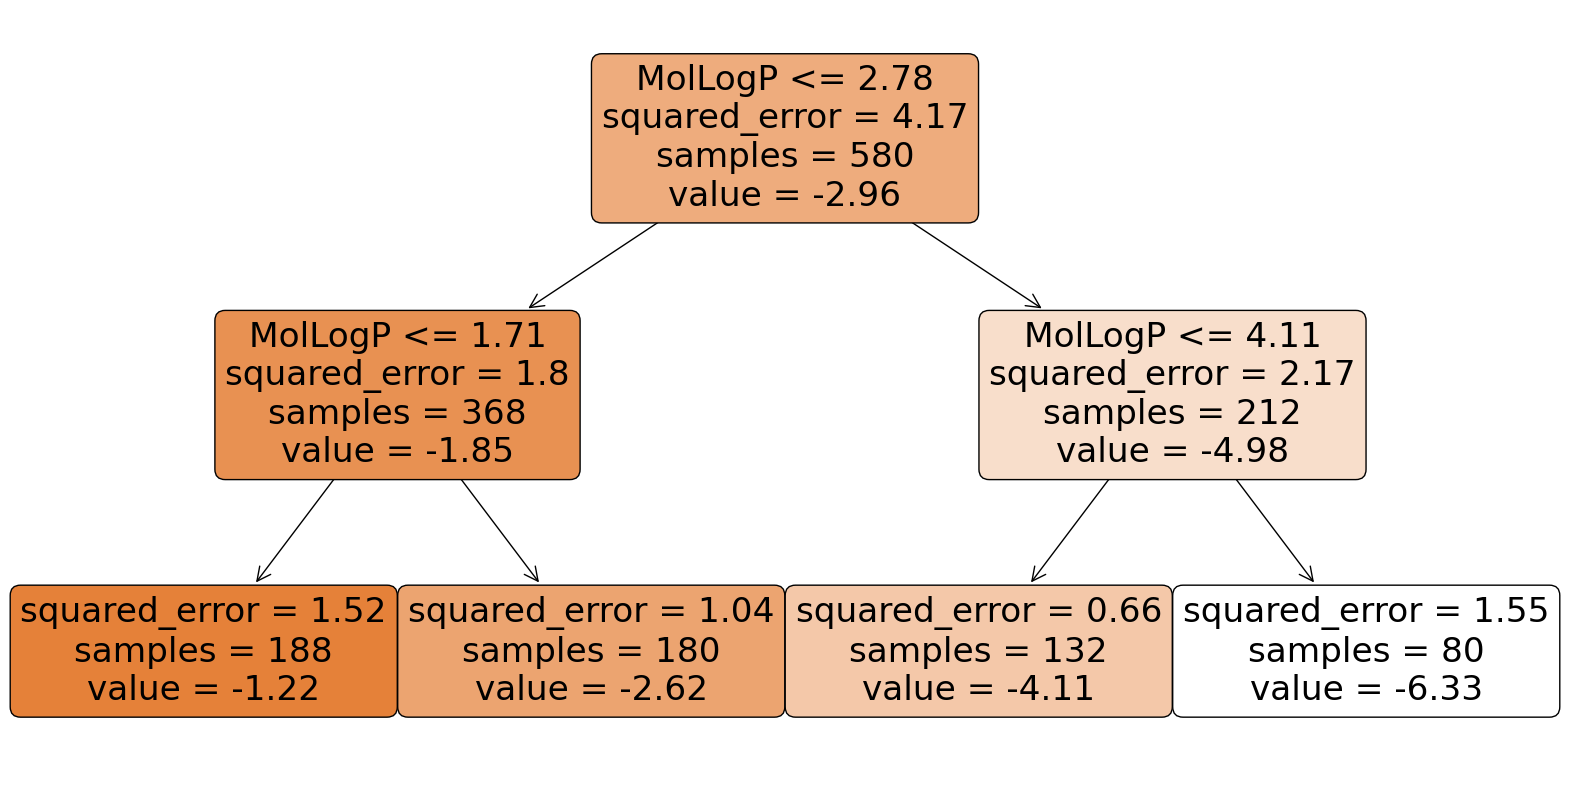

In [114]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree_index = 0  # Index of the tree to visualise

# Convert feature names from pandas Index object to list
feature_names_list = X_train.columns.tolist()

# Visualise the chosen tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[tree_index], 
          feature_names=feature_names_list, 
          filled=True, impurity=True, 
          rounded=True, precision=2)
plt.show()